In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvangvcHJvamVjdHMvbm90ZXNfZm9yX2RlZXBfcmxfaGFuZHNfb24='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/usr/lib/python3.12/importlib/_bootstrap.py": 1738680515.0, "/usr/lib/python3.12/importlib/_bootstrap_external.py": 1738680515.0, "/usr/lib/python3.12/zipimport.py": 1738680515.0, "/usr/lib/python3.12/codecs.py": 1738680515.0, "/usr/lib/python3.12/encodings/aliases.py": 1738680515.0, "/usr/lib/python3.12/encodings/__init__.py": 1738680515.0, "/usr/lib/python3.12/encodings/utf_8.py": 1738680515.0, "/usr/lib/python3.12/abc.py": 1738680515.0, "/usr/lib/python3.12/io.py": 1738680515.0, "/usr/lib/python3.12/stat.py": 1738680515.0, "/usr/lib/python3.12/_collections_abc.py": 1738680515.0, "/usr/lib/python3.12/genericpath.py": 1738680515.0, "/usr/lib/python3.12/posixpath.py": 1738680515.0, "/usr/lib/python3.12/os.py": 1738680515.0, "/usr/lib/python3.12/_sitebuiltins.py": 1738680515.0, "/home/jx/projects/notes_for_deep_rl_hands_on/venv/lib/python3.12/site-packages/_distutils_hack/__init__.py": 1748009708.6385362, "/usr/lib/python3.12/sitecustomize.py": 1712727227.0, "/usr/lib/python3.12/site.

In [2]:
# === importing pyTorch ===
import torch

In [3]:
# === a vector in pyTorch ===
torch.tensor([1, 2, 3])

tensor([1, 2, 3])

In [4]:
# === some elemental ways to generate tensors ===
print("\n a rank-2 tensor full of 0s")
print(torch.zeros((3, 2)))

print("\n a rank-2 tensor full of 7s")
print(torch.full((3, 2), 7))

print("\n a rank-2 tensor randomly filled with [0-9]")
print(torch.randint(0, 10, (3, 2)))


 a rank-2 tensor full of 0s
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

 a rank-2 tensor full of 7s
tensor([[7, 7],
        [7, 7],
        [7, 7]])

 a rank-2 tensor randomly filled with [0-9]
tensor([[1, 1],
        [1, 6],
        [3, 7]])


In [5]:
# === the shape of a tensor ===
t = torch.zeros((3, 2))
print(t.shape)

torch.Size([3, 2])


In [6]:
# === stacking tensors ===
# create three rank-2 tensors
tensor1 = torch.tensor([[1, 2], [3, 4]])
tensor2 = torch.tensor([[5, 6], [7, 8]])
tensor3 = torch.tensor([[9, 10], [11, 12]])

# stack the tensors along a new axis
stacked_tensor = torch.stack((tensor1, tensor2, tensor3))
stacked_tensor

tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])

In [7]:
# === slicing tensors ===
stacked_tensor[1]

tensor([[5, 6],
        [7, 8]])

In [8]:
# === index positions of tensors ===
# each entry in this tensor shows it's coordinate in mathematical notation
t = torch.tensor(
    [
        [[111, 112, 113, 114], [121, 122, 123, 124], [131, 132, 133, 134]],
        [[211, 212, 213, 214], [221, 222, 223, 224], [231, 232, 233, 234]],
    ]
)
print(t)
print(f"The element at mathematical position (2,3,4) is: {t[1][2][3]}")

tensor([[[111, 112, 113, 114],
         [121, 122, 123, 124],
         [131, 132, 133, 134]],

        [[211, 212, 213, 214],
         [221, 222, 223, 224],
         [231, 232, 233, 234]]])
The element at mathematical position (2,3,4) is: 234


In [9]:
import torch.nn as nn

In [10]:
# === manually setting parameters ===
# Create a linear layer
linear_nn = nn.Linear(3, 2)

# Manually set the weights
weights = torch.tensor([[1.0, 0.0, 1.0], [0.0, 1.0, -1.0]])

# Manually set the bias
bias = torch.tensor([2.0, -3.0])

# Assign the weights and bias to the linear layer
linear_nn.weight = nn.Parameter(weights)
linear_nn.bias = nn.Parameter(bias)

In [11]:
v = torch.tensor([1.0, 0.0, 0.0])
linear_nn.forward(v)

tensor([ 3., -3.], grad_fn=<ViewBackward0>)

In [12]:
import torch.nn as nn
import torch

# linear net representing f(x) = 0.0 x + 0.0
model_net = nn.Linear(1, 1)
model_net.weight = nn.Parameter(torch.tensor([[0.0]]))
model_net.bias = nn.Parameter(torch.tensor([0.0]))

x = torch.tensor([3.0])
y = torch.tensor([5.0])
f_x = model_net.forward(x)

loss = (f_x - y).pow(2)
loss.backward()  # <- this computes gradients for parameters

# and this is how we can access them
print(f"grad(w): {model_net.weight.grad}")
print(f"grad(b): {model_net.bias.grad}")

grad(w): tensor([[-30.]])
grad(b): tensor([-10.])


In [13]:
# === Simple example with linear layers ===
torch.manual_seed(7)
eta = 0.1

# target function with (w,b) = (2,1)
target_function = nn.Linear(1, 1)
target_function.weight = nn.Parameter(torch.tensor([[2.0]]))
target_function.bias = nn.Parameter(torch.tensor([1.0]))

# model function initialized with (w,b) = (0,0)
model_net = nn.Linear(1, 1)
model_net.weight = nn.Parameter(torch.tensor([[0.0]]))
model_net.bias = nn.Parameter(torch.tensor([0.0]))


# this is one step
def step(x, y):
    o = model_net.forward(x)
    loss = (o - y).pow(2)
    loss.backward()

    model_net.weight = nn.Parameter(model_net.weight - eta * model_net.weight.grad)
    model_net.bias = nn.Parameter(model_net.bias - eta * model_net.bias.grad)


# do 200 steps and record each θ = (w,b)
torch_path = []
for _ in range(200):
    torch_path.append(
        (model_net.weight.data[0].item(), model_net.bias.data.data[0].item())
    )
    x = torch.rand((1, 1))
    y = target_function.forward(x)
    step(x, y)
print(f"the final θ = {torch_path[-1]}")

the final θ = (1.9013594388961792, 1.0614407062530518)


In [14]:
torch_path[0:5]

[(0.0, 0.0),
 (0.0682234913110733, 0.2931046187877655),
 (0.19812387228012085, 0.5987083911895752),
 (0.23019880056381226, 0.7535954117774963),
 (0.4016020596027374, 1.0257779359817505)]

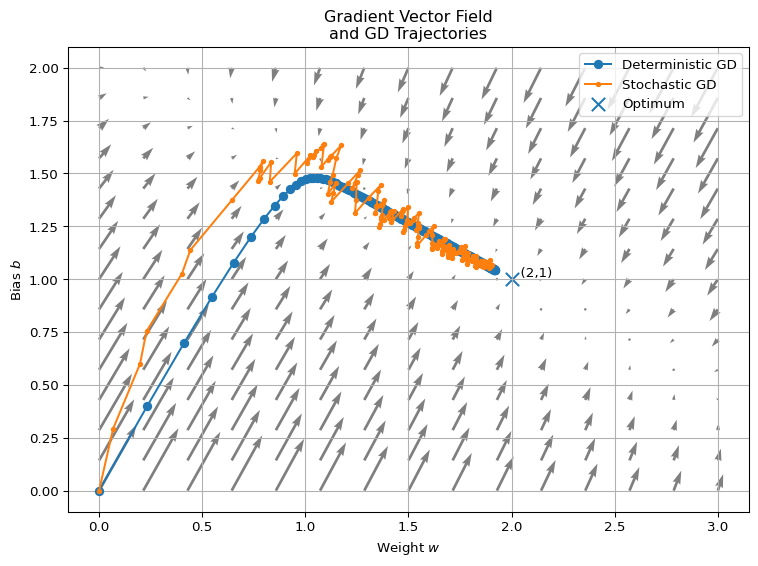

In [15]:
# | code-fold: true
import numpy as np
import matplotlib.pyplot as plt

# ── Settings ───────────────────────────────────
w_star, b_star = 2.0, 1.0
A = np.array([[2 / 3, 1.0], [1.0, 2.0]])  # Hessian of expected MSE
lr = 0.1
num_steps = 200

# ── Build grid for vector field ───────────────
w_vals = np.linspace(0, 3, 15)
b_vals = np.linspace(0, 2, 15)
W, B = np.meshgrid(w_vals, b_vals)
U = np.zeros_like(W)
V = np.zeros_like(B)

# Compute field:   (U,V) = - ∇F = -A·(θ−θ*)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        theta = np.array([W[i, j], B[i, j]])
        grad = A.dot(theta - np.array([w_star, b_star]))
        U[i, j] = -grad[0]
        V[i, j] = -grad[1]

# ── Deterministic GD trajectory ──────────────
det_path = [(0.0, 0.0)]
for _ in range(num_steps):
    w, b = det_path[-1]
    grad = A.dot(np.array([w, b]) - np.array([w_star, b_star]))
    det_path.append((w - lr * grad[0], b - lr * grad[1]))
w_det, b_det = zip(*det_path)


# from pyTorch
w_torch, b_torch = zip(*torch_path)

# ── Plot vector field + paths ────────────────
plt.figure(figsize=(8, 6))
plt.quiver(W, B, U, V, angles="xy", scale_units="xy", alpha=0.5)
plt.plot(w_det, b_det, "o-", label="Deterministic GD")
plt.plot(w_torch, b_torch, ".-", label="Stochastic GD")
plt.scatter([w_star], [b_star], marker="x", s=100, label="Optimum")
plt.text(w_star, b_star, "  (2,1)", va="bottom")

plt.xlabel("Weight $w$")
plt.ylabel("Bias $b$")
plt.title("Gradient Vector Field\nand GD Trajectories")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
t = torch.tensor([1, 2])
t.unsqueeze(0)

tensor([[1, 2]])

In [17]:
t = torch.randn(2, 1, 2, 1)
print(f"before squeeze: {t.shape}")
t = t.squeeze()
print(f"after squeeze: {t.shape}")

before squeeze: torch.Size([2, 1, 2, 1])
after squeeze: torch.Size([2, 2])


In [18]:
# === Simple example with linear layers ===
torch.manual_seed(0)
BATCH_SIZE = 20
STEP_SIZE = 0.1
STEPS = 100

# target function with (w,b) = (2,1)
target_function = nn.Linear(1, 1)
target_function.weight = nn.Parameter(torch.tensor([[2.0]]))
target_function.bias = nn.Parameter(torch.tensor([1.0]))

# model function initialized with (w,b) = (0,0)
model_net = nn.Linear(1, 1)
model_net.weight = nn.Parameter(torch.tensor([[0.0]]))
model_net.bias = nn.Parameter(torch.tensor([0.0]))


# this is one step
def step(x_batch, y_batch):
    loss = (model_net.forward(x_batch) - y_batch).pow(2).mean()
    loss.backward()

    model_net.weight = nn.Parameter(
        model_net.weight - STEP_SIZE * model_net.weight.grad
    )
    model_net.bias = nn.Parameter(model_net.bias - STEP_SIZE * model_net.bias.grad)


# do steps and record each θ = (w,b)
torch_path = []
for _ in range(STEPS):
    torch_path.append(
        (model_net.weight.data[0].item(), model_net.bias.data.data[0].item())
    )
    x_batch = torch.rand((BATCH_SIZE, 1))
    y_batch = target_function.forward(x_batch)
    step(x_batch, y_batch)
print(f"the final θ = {torch_path[-1]}")
print((7 / 30, 0.4))

the final θ = (1.693508267402649, 1.1575511693954468)
(0.23333333333333334, 0.4)


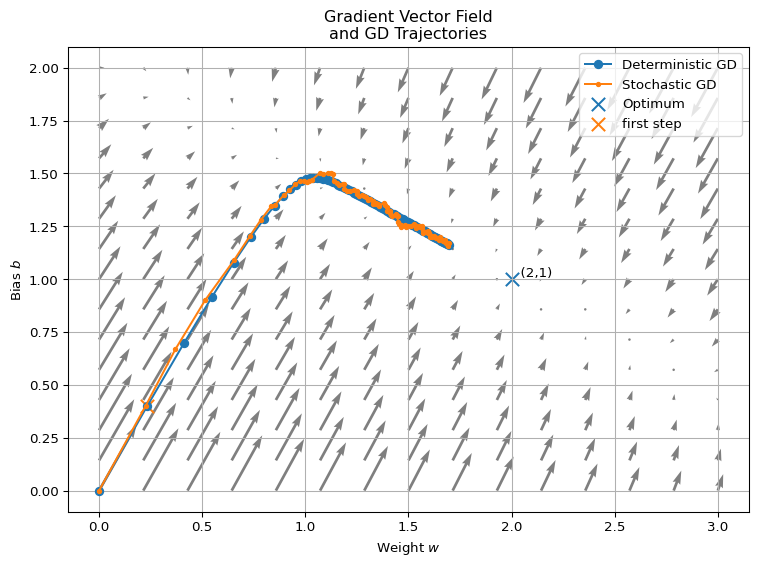

In [19]:
# | code-fold: true
import numpy as np
import matplotlib.pyplot as plt

# ── Settings ───────────────────────────────────
w_star, b_star = 2.0, 1.0
A = np.array([[2 / 3, 1.0], [1.0, 2.0]])  # Hessian of expected MSE
lr = 0.1
num_steps = 100

# ── Build grid for vector field ───────────────
w_vals = np.linspace(0, 3, 15)
b_vals = np.linspace(0, 2, 15)
W, B = np.meshgrid(w_vals, b_vals)
U = np.zeros_like(W)
V = np.zeros_like(B)

# Compute field:   (U,V) = - ∇F = -A·(θ−θ*)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        theta = np.array([W[i, j], B[i, j]])
        grad = A.dot(theta - np.array([w_star, b_star]))
        U[i, j] = -grad[0]
        V[i, j] = -grad[1]

# ── Deterministic GD trajectory ──────────────
det_path = [(0.0, 0.0)]
for _ in range(num_steps):
    w, b = det_path[-1]
    grad = A.dot(np.array([w, b]) - np.array([w_star, b_star]))
    det_path.append((w - lr * grad[0], b - lr * grad[1]))
w_det, b_det = zip(*det_path)


# from pyTorch
w_torch, b_torch = zip(*torch_path)

# ── Plot vector field + paths ────────────────
plt.figure(figsize=(8, 6))
plt.quiver(W, B, U, V, angles="xy", scale_units="xy", alpha=0.5)
plt.plot(w_det, b_det, "o-", label="Deterministic GD")
plt.plot(w_torch, b_torch, ".-", label="Stochastic GD")
plt.scatter([w_star], [b_star], marker="x", s=100, label="Optimum")
plt.scatter([7 / 30], [0.4], marker="x", s=100, label="first step")
plt.text(w_star, b_star, "  (2,1)", va="bottom")

plt.xlabel("Weight $w$")
plt.ylabel("Bias $b$")
plt.title("Gradient Vector Field\nand GD Trajectories")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
import numpy as np

x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)

result = x + 2 * y
result.backward()


print(f"gradient for x:  {x.grad}")
print(f"gradient for y: {y.grad}")

gradient for x:  tensor([1.])
gradient for y: tensor([2.])


In [21]:
result

tensor([5.], grad_fn=<AddBackward0>)

In [22]:
print(x * y)
print(x / y)
print(max(x, y))
print(x < y)
print(x.unsqueeze(0))

tensor([2.], grad_fn=<MulBackward0>)
tensor([0.5000], grad_fn=<DivBackward0>)
tensor([2.], requires_grad=True)
tensor([True])
tensor([[1.]], grad_fn=<UnsqueezeBackward0>)


In [23]:
print(x.view(-1, x.size(-1)))

tensor([[1.]], grad_fn=<ViewBackward0>)


In [24]:
# === combining networks ===
input_layer = nn.Linear(4, 125)
hidden_layer = nn.Linear(125, 125)
output_layer = nn.Linear(125, 2)

sequential_nn = nn.Sequential(input_layer, hidden_layer, output_layer)


tensor = torch.tensor([1.0, 2.0, 3.0, 4.0]).unsqueeze(0)

# Applying sequential_nn produces the same as...
print(f"sequential_nn: {sequential_nn(tensor)}")
# ... applying the individual layers in order
print(f"concatenated: {output_layer(hidden_layer(input_layer(tensor)))}")

sequential_nn: tensor([[-0.4515,  0.2871]], grad_fn=<AddmmBackward0>)
concatenated: tensor([[-0.4515,  0.2871]], grad_fn=<AddmmBackward0>)


In [25]:
# === ReLU clips input ===
layer = nn.ReLU()

layer(torch.tensor([1, 0, -1]).unsqueeze(0))

tensor([[1, 0, 0]])

In [26]:
# === combining linear with relu ===
nn.Sequential(
    nn.Linear(6, 125), nn.ReLU(), nn.Linear(125, 125), nn.ReLU(), nn.Linear(125, 2)
)

Sequential(
  (0): Linear(in_features=6, out_features=125, bias=True)
  (1): ReLU()
  (2): Linear(in_features=125, out_features=125, bias=True)
  (3): ReLU()
  (4): Linear(in_features=125, out_features=2, bias=True)
)

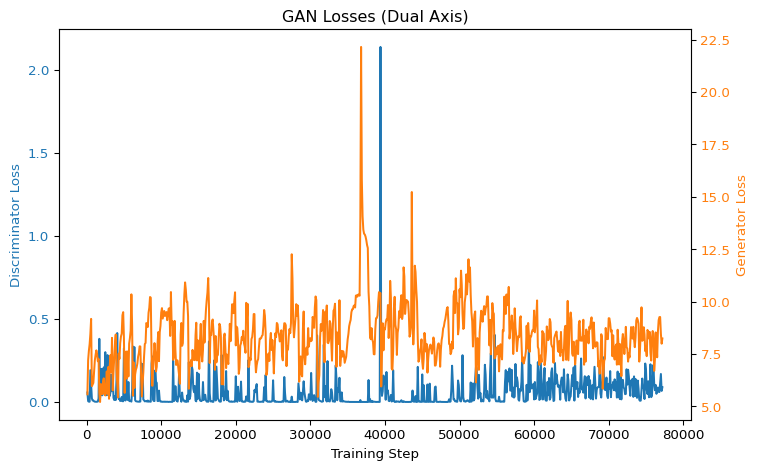

In [27]:
# | code-fold: true
import pandas as pd
import matplotlib.pyplot as plt

# adjust these paths to wherever you saved your CSVs
disc_csv = "quarto/data/atari_gan_dis_loss.csv"
gen_csv = "quarto/data/atari_gan_gen_loss.csv"

# TensorBoard CSVs typically have columns: wall_time, step, value
df_disc = pd.read_csv(disc_csv)
df_gen = pd.read_csv(gen_csv)

# Create plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# Left y-axis: Discriminator loss
ax1.plot(
    df_disc["Step"], df_disc["Value"], color="tab:blue", label="Discriminator Loss"
)
ax1.set_xlabel("Training Step")
ax1.set_ylabel("Discriminator Loss", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Right y-axis: Generator loss
ax2 = ax1.twinx()
ax2.plot(df_gen["Step"], df_gen["Value"], color="tab:orange", label="Generator Loss")
ax2.set_ylabel("Generator Loss", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

# Title and layout
plt.title("GAN Losses (Dual Axis)")
fig.tight_layout()
plt.show()